# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymFullDF = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
pymFullDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [102]:
# Checking the number of mice.
mice = pymFullDF["Mouse ID"].value_counts()
miceCount = len(mice)
print(f"There are {miceCount} mice in the Pymaceuticals study.")

There are 249 mice in the Pymaceuticals study.


In [103]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseID = pymFullDF.loc[pymFullDF.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicateMouseID

array(['g989'], dtype=object)

In [104]:
# Optional: Get all the data for the duplicate mouse ID. 
combo_mouse = pymFullDF.loc[pymFullDF["Mouse ID"] == "g989", :]
combo_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = pymFullDF[pymFullDF["Mouse ID"].isin(duplicateMouseID)==False]
cleanDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [106]:
# Checking the number of mice in the clean DataFrame.
cleanMice = cleanDF["Mouse ID"].value_counts()
cleanMiceCount = len(cleanMice)
cleanMiceCount

248

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


tumor_regimen_mean = cleanDF.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
tumor_regimen_median = cleanDF.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_regimen_variance = cleanDF.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_regimen_stdev = cleanDF.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_regimen_sem = cleanDF.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


summary_stats_table = pd.DataFrame({"Mean": tumor_regimen_mean,
                                    "Median": tumor_regimen_median, 
                                    "Variance": tumor_regimen_variance, 
                                    "Standard Deviation": tumor_regimen_stdev,
                                    "SEM": tumor_regimen_sem}) 

summary_stats_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.


summary_aggregationDF = cleanDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
summary_aggregationDF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Regimen over Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

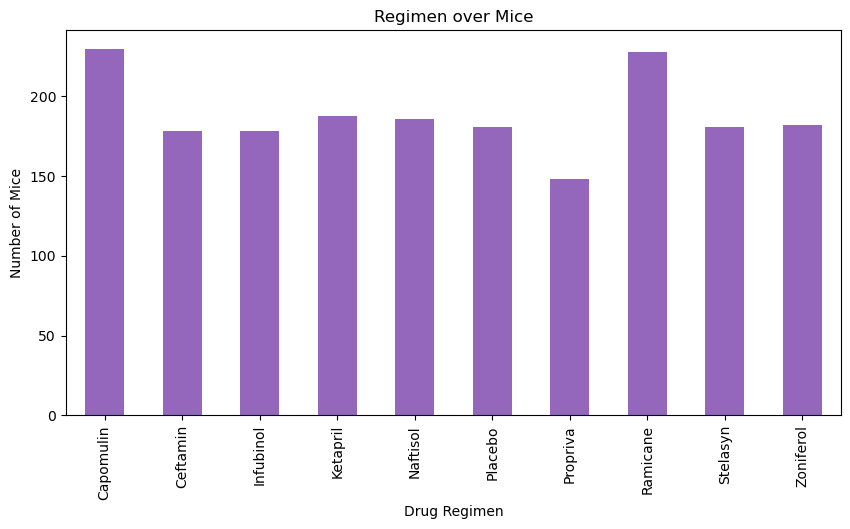

In [132]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

miceBar = cleanDF.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

miceBar.plot.bar(title='Regimen over Mice',y='Number of Mice', color='tab:purple', figsize=(10,5))


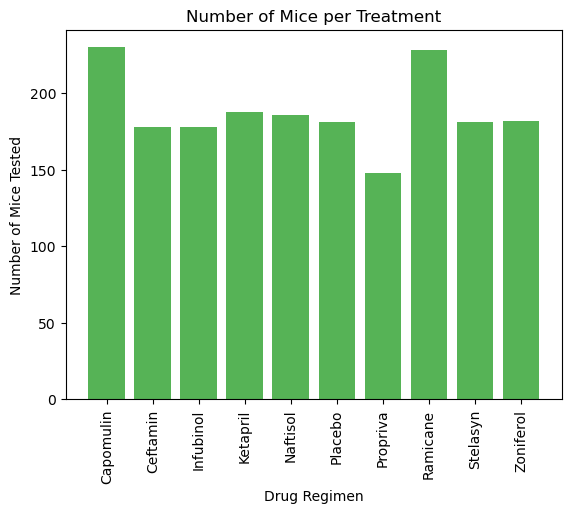

<Figure size 640x480 with 0 Axes>

In [141]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xAxis = miceBar.index.values
yAxis = miceBar.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(xAxis, yAxis, color='tab:green', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()
plt.tight_layout()


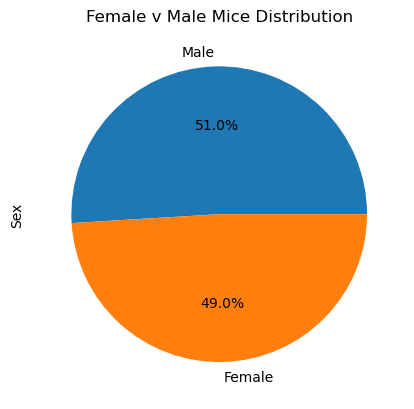

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderData = cleanDF["Sex"].value_counts()
genderData.plot.pie(autopct= "%1.1f%%")
plt.title("Female v Male Mice Distribution")
plt.show()


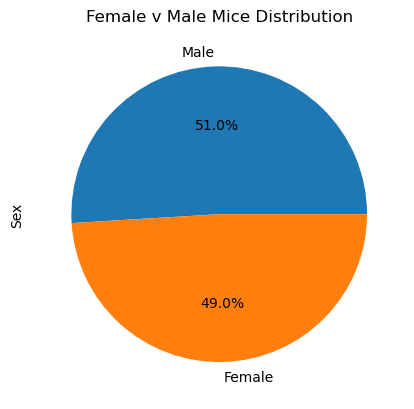

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = genderData.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female v Male Mice Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

lastTimepoint = pymFullDF.groupby(["Mouse ID"])["Timepoint"].max()
lastTimepoint = lastTimepoint.reset_index()

mergedDataLastTimepoint = lastTimepoint.merge(pymFullDF, on=["Mouse ID", "Timepoint"], how="left")
mergedDataLastTimepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [153]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

totalTumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = mergedDataLastTimepoint.loc[mergedDataLastTimepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    totalTumorVol.append(tumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumorVol.loc[(tumorVol < lower_bound) | (tumorVol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


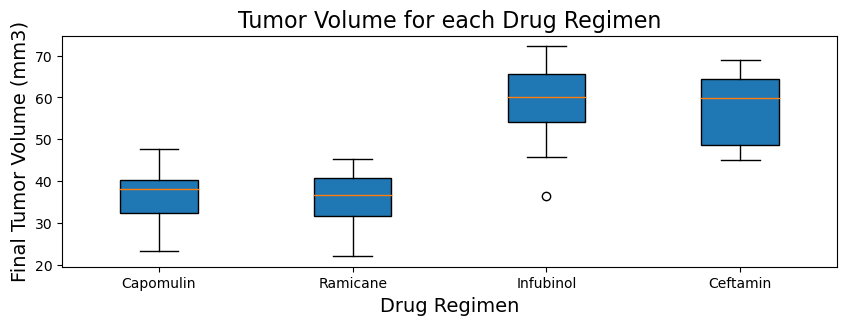

<Figure size 640x480 with 0 Axes>

In [155]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(10,3))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(totalTumorVol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)
plt.show()
plt.tight_layout()


## Line and Scatter Plots

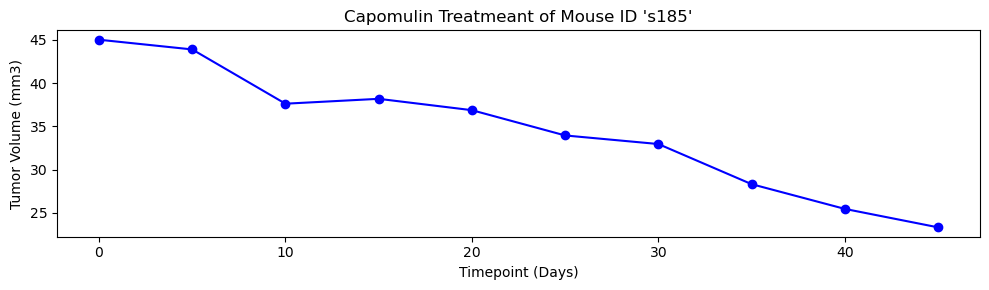

In [142]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulinDF = pymFullDF.loc[pymFullDF["Drug Regimen"] == "Capomulin",:]
capomulinDF

capomulinMouse = capomulinDF.loc[capomulinDF["Mouse ID"] == "s185",:]
capomulinMouse

xAxis = capomulinMouse["Timepoint"]
tumorVolume = capomulinMouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 3))
plt.title("Capomulin Treatmeant of Mouse ID 's185'")
plt.plot(xAxis, tumorVolume, marker="o",color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show
plt.tight_layout()


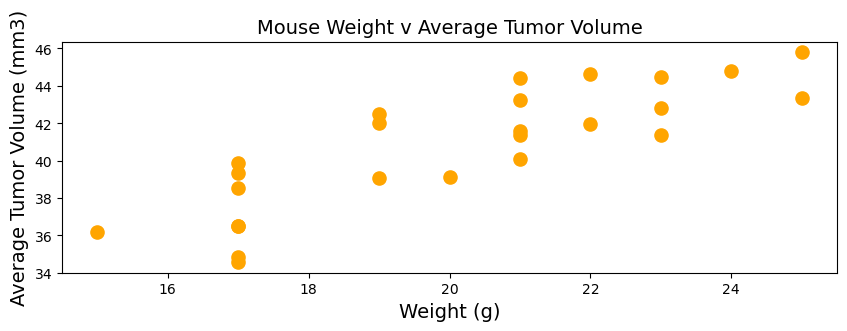

<Figure size 640x480 with 0 Axes>

In [147]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avgCapDF = capomulinDF.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(10, 3))

plt.scatter(avgCapDF['Weight (g)'],avgCapDF['Tumor Volume (mm3)'],s=90, color="orange")
plt.title("Mouse Weight v Average Tumor Volume",fontsize =14)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =14)

plt.show()
plt.tight_layout()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

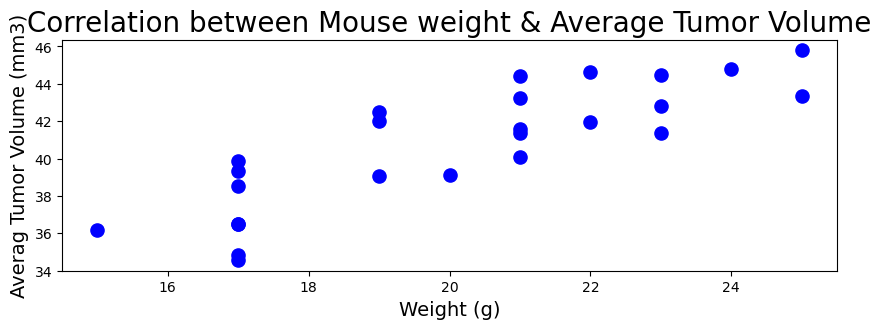

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avgCapDF['Weight (g)'],avgCapDF['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(10, 3))
plt.scatter(avgCapDF['Weight (g)'],avgCapDF['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)
